# PyCon 2019: Data Science Best Practices with pandas

    Analysis of TED Talks dataset.
    
This video helped me in this analysis: https://www.youtube.com/watch?v=dPwLlJkSHLo&list=WL&index=12&t=248s

## Agenda 
    1 - Exploring the data
    2 - Analysis
        2.1 Which talks provoke the most online discussion?
        2.2 Visualize the distribution of comments
        2.3 Plot the number of talks that took place each year
        
### Lessons from this mini-project:
    1. Consider the limitations and biases of your data when analyzing it.
    2. Make your results understandable.
    
    1. Choose your plot type based on the question you are answering and the data type(s) you are working with
    2. Try modifying the plot defaults
    3. Creating plots involves decision-making (because you can't show everything)

    1. Read the documentation
    2. Use the datetime data type for dates and times
    3. Check your work as you go
    4. Consider excluding data if it might not be relevant
    


In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ted = pd.read_csv('ted.csv')

## Exploring the data
    So We'll know how it is organized and that will make us also know
    how to deal with the data when trying to respond our questions.

In [4]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
# rows, columns
'''
    Since each row represents a single talk, We have here a total of 2550
    talks.

'''

ted.shape

(2550, 17)

In [6]:
# Object columns are usually strings (str), but can also be arbitrary Python objects (lists, dictionaries...)

ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [7]:
'''
    We did see the columns before, but here's a shorter version of theirs visualization
'''

ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [8]:
# Basic information about the DataFrame

ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [9]:
# Some statistical descriptions

ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [10]:
# Let's see if there's any columns with Null value in our data

ted.isnull().any()

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

In [11]:
# Counting the number of missing values in each column
'''
    In this case, it's not really something we should worry about,
    since there are only 6 of them...
'''

ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [12]:
# Percentage of missing values
'''
    The missing values represent less than 1 percent of the column.
'''

ted.isna().sum() / ted.shape[0]

comments              0.000000
description           0.000000
duration              0.000000
event                 0.000000
film_date             0.000000
languages             0.000000
main_speaker          0.000000
name                  0.000000
num_speaker           0.000000
published_date        0.000000
ratings               0.000000
related_talks         0.000000
speaker_occupation    0.002353
tags                  0.000000
title                 0.000000
url                   0.000000
views                 0.000000
dtype: float64

## 2 Analysis
### 2.1 Which talks provoke the most online discussion?

In [13]:
'''
    We can think about looking at the number of comments, the more people comment the more
    discussion, right? Well, not quite.    
    We could sort the data by the number of comments, though this approach is biased in favor
    of older talks. It's expected that the last launched talk has fewer viewers (hence, fewer
    comments) than any talk before that.

    .sort_values() sorts in ascending order, than the high values will be at the end .tail()
'''

ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [14]:
'''
    We can "correct" this bias by calculating the number of comments per view.
    That way, We can create a proportion analysis, making it 'fairer'
    
    ps: column ['comments_per_view'] will be added as the last column
'''

ted['comments_per_view'] = ted.comments / ted.views

In [15]:
# Interpretation: for every view of 'The same-sex marriage' talk, there are 0.002 comments
#                for every view of 'E-voting without fraud' talk, there are 0.001 comments

ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [16]:
# Making this more interpretable by inverting the calculation

ted['views_per_comment'] = ted.views / ted.comments

In [17]:
# Interpretation: 1 out of every 450 people leave a comment on 'The case for same-sex marriage'
#         whereas 1 out of every 651 people leave a comment on 'E-voting without fraud

ted.sort_values('views_per_comment').head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


### Which talks provoke the most online discussion?
    'The same-sex marriage', 'E-voting without fraud' and
    'Militant atheism'
    
    Lessons:
    1. Consider the limitations and biases of your data when analyzing it.
    2. Make your results understandable.

### 2.2 Visualize the distribution of comments

In [18]:
# Talks with most numbers of comments 

ted[['title', 'comments']].sort_values('comments', ascending=False).head()


,title,comments
96,Militant atheism,6404
0,Do schools kill creativity?,4553
644,Science can answer moral questions,3356
201,My stroke of insight,2877
1787,How do you explain consciousness?,2673


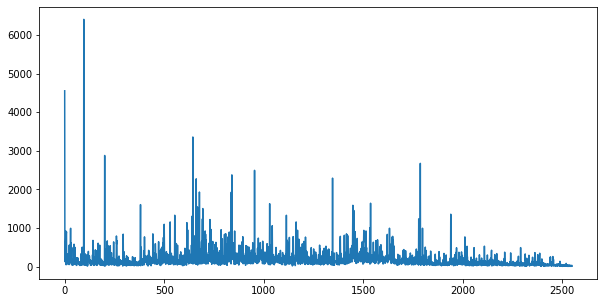

In [19]:
# A line plot is not appropriate here (use it to measure something over time)

plt.figure(figsize=(10,5))
ted.comments.plot()

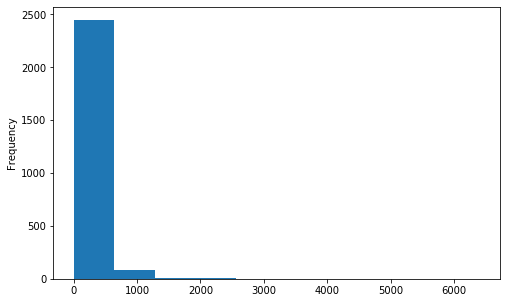

In [20]:
# Histogram shows the frequency distribution of a single numeric variable
'''
    It's still a poor visualization, but We can improve it by, firstly, noticing
    that there'are a lot of talks with few comments. And finally, adjusting the
    chart in order to make easier to notice that. 
'''

plt.figure(figsize=(8,5))

ted.comments.plot(kind='hist')

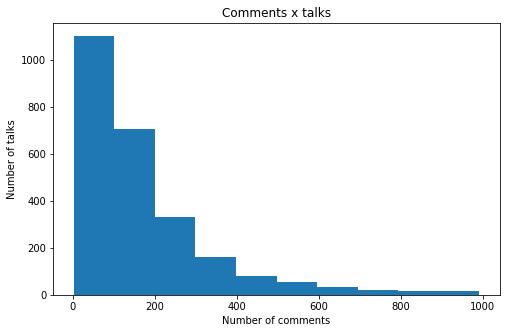

In [21]:
# Modifying the plot to be more informative, by showing the quantity of 
# talks with less than 1000 comments

plt.figure(figsize=(8,5))

ted[ted.comments < 1000].comments.plot(kind='hist')

plt.title('Comments x talks')
plt.xlabel('Number of comments')
plt.ylabel('Number of talks')

plt.show()

In [22]:
# Check how many observations we removed from the plot. We're only losing 32 of them.
ted[ted.comments >= 1000].shape

(32, 19)

In [23]:
# And We're using 2518
ted[ted.comments < 1000].shape

(2518, 19)

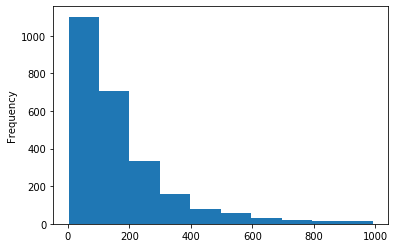

In [24]:
# You can also write this using the .query() method
ted.query('comments < 1000').comments.plot(kind='hist')

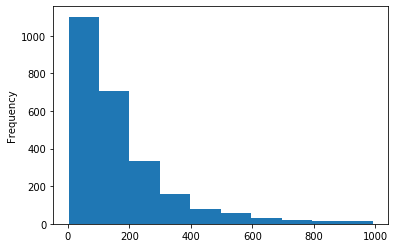

In [25]:
# or using the loc accessor
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

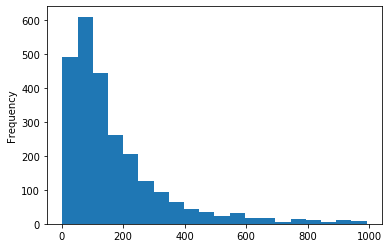

In [26]:
# Now, let's increase the number of bins to see the information more detailed.

ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

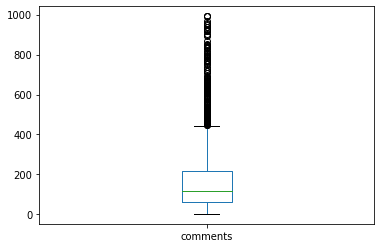

In [27]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

Lessons:

1. Choose your plot type based on the question you are answering and the data type(s) you are working with
2. Try modifying the plot defaults
3. Creating plots involves decision-making (because you can't show everything)

### 2.3 Plot the number of talks that took place each year

Bonus exercise: calculate the average delay between filming and publishing

In [28]:
# Event column does not always include the year

ted.event.sample(10)

2111             TEDxCambridge
2258               TEDxBoulder
1079          TEDxBoulder 2011
2137           Mission Blue II
138                    TED2007
1694            TEDGlobal 2012
936                    TED2011
631                    TED2010
1676    TEDxHousesOfParliament
1012            TEDGlobal 2011
Name: event, dtype: object

    Obs: Dataset documentation for film_date says "Unix timestamp of the filming"
         It's a specific one.
         We'll have to handle it i a specific way

In [29]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [30]:
# Results don't look right
pd.to_datetime(ted.film_date).head()

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

[pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [31]:
# Now the results look right
pd.to_datetime(ted.film_date, unit='s').head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [32]:
# Apllying the changes to the column

ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [33]:
# Verify that event name matches film_datetime for a random sample

ted[['event', 'film_datetime']].sample(5)

,event,film_datetime
1260,TED2012,2012-03-01
1286,TEDxAustin,2012-02-11
2374,TEDMED 2016,2016-11-30
230,TED2008,2008-02-29
578,TEDGlobal 2009,2009-07-22


In [34]:
# New column uses the datetime data type (this was an automatic conversion)

ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [35]:
# Datetime columns have convenient attributes under the .dt namespace

ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [36]:
# Similar to string methods under the .str namespace

ted.event.str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

In [37]:
# Counting the number of talks for each year using value_counts()

ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

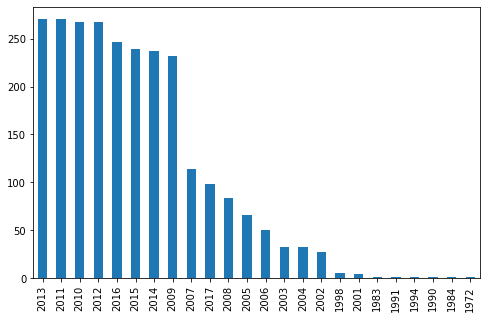

In [38]:
# Ploting the previous data
''' But as I said before, a line plot is appropriate when measuring something over time '''

plt.figure(figsize=(8,5))
ted.film_datetime.dt.year.value_counts().plot.bar()
plt.show()

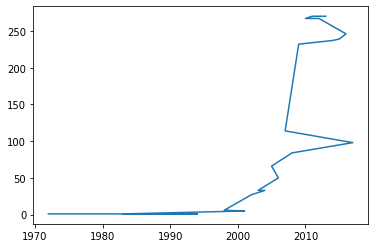

In [39]:
# Points are plotted and connected in the order you give them to pandas. And...

ted.film_datetime.dt.year.value_counts().plot()

In [40]:
#... that means We need to sort the index before plotting

ted.film_datetime.dt.year.value_counts().sort_index()

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: film_datetime, dtype: int64

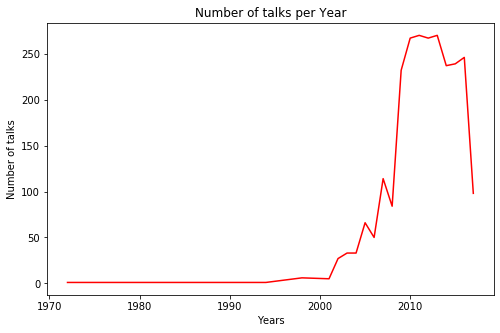

In [41]:
# And now

plt.figure(figsize=(8,5))
ted.film_datetime.dt.year.value_counts().sort_index().plot(color='r')
plt.xlabel('Years')
plt.ylabel('Number of talks')
plt.title('Number of talks per Year')

plt.show()

In [42]:
'''
    ps: we only have partial data for 2017. That means the line drop
    in the end of the chart is not necessarily because the number of talks
    have actually been droping. For now, it's just incomplete data.
'''

ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

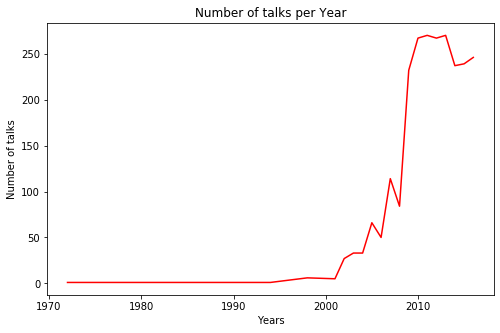

In [43]:
talks_per_year = ted.film_datetime.dt.year.value_counts().sort_index()

talks_per_year.drop(index=2017, inplace=True)

plt.figure(figsize=(8,5))
talks_per_year.plot(color='r')
plt.xlabel('Years')
plt.ylabel('Number of talks')
plt.title('Number of talks per Year')

plt.show()

Lessons:

1. Read the documentation
2. Use the datetime data type for dates and times
3. Check your work as you go
4. Consider excluding data if it might not be relevant